In [1]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.2. Confusion Matrix Figure/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.2. Confusion Matrix Figure/Output')
cur_date = "032422"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in files
confusion_matrix_df = data.frame(read_excel("030922_Ozone_Response_All_Model_Results.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(confusion_matrix_df)

,Model,Response,Covariates,Kernel,Balanced.Accuracy,Sensitivity,Specificity,PPV,AUC
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,RF Classification,Inflammatory,Yes,NA,0.5666667,0.9333333,0.2,0.706666666666667,0.5666667
2,SVM Classification,Inflammatory,No,polynomial,0.5333333,0.8666667,0.2,0.70333333333333303,0.5333333
3,SVM Classification,Inflammatory,No,radial,0.5000000,1.0000000,0.0,0.67333333333333301,0.5000000
4,SVM Classification,Inflammatory,Yes,radial,0.5000000,1.0000000,0.0,0.67333333333333301,0.5000000
5,KNN Classification,Inflammatory,No,NA,0.5000000,0.0000000,1.0,NA,0.5000000
6,KNN Classification,Inflammatory,Yes,NA,0.5000000,0.0000000,1.0,NA,0.5000000


In [7]:
longer_confusion_matrix = confusion_matrix_df %>%
    mutate(PPV = as.numeric(PPV)) %>%
    pivot_longer(cols = 5:9, names_to = "Metric", values_to = "Value")
head(longer_confusion_matrix)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Model,Response,Covariates,Kernel,Metric,Value
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
RF Classification,Inflammatory,Yes,NA,Balanced.Accuracy,0.5666667
RF Classification,Inflammatory,Yes,NA,Sensitivity,0.9333333
RF Classification,Inflammatory,Yes,NA,Specificity,0.2000000
RF Classification,Inflammatory,Yes,NA,PPV,0.7066667
RF Classification,Inflammatory,Yes,NA,AUC,0.5666667
SVM Classification,Inflammatory,No,polynomial,Balanced.Accuracy,0.5333333


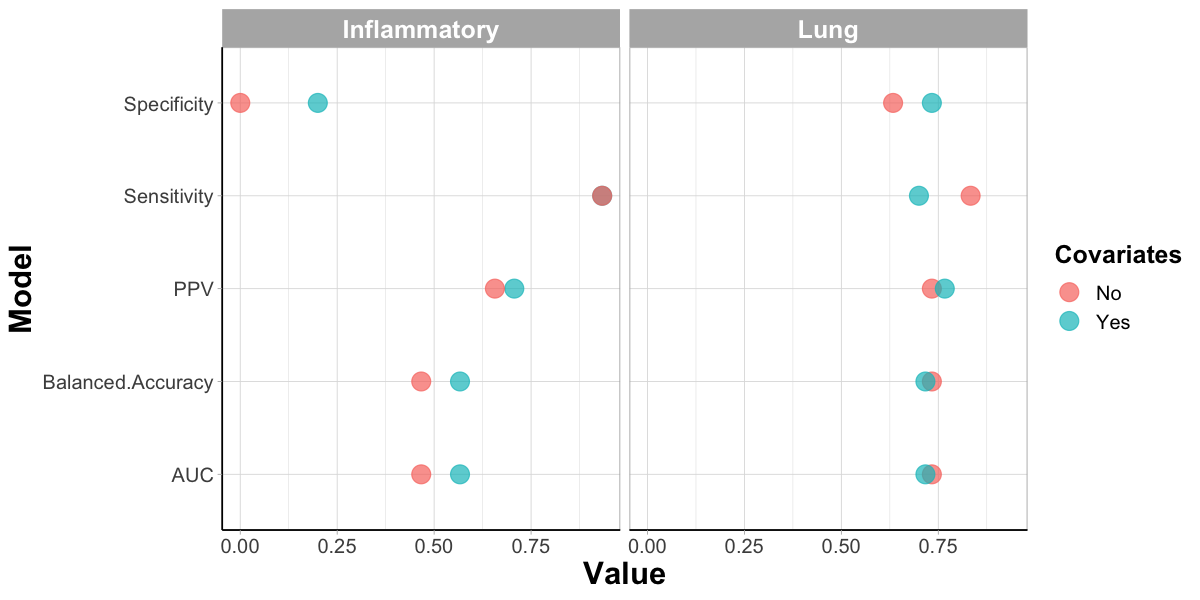

In [34]:
options(repr.plot.width=10, repr.plot.height=5) #changing size
ggplot() + 
  geom_point(data = longer_confusion_matrix %>%
                 filter(Model == "RF Classification"), aes(x = Value, y = Metric, color = Covariates), size = 5,
            alpha = 0.7) + 

  facet_wrap(~Response) + 
  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Value') + ylab('Model')  #changing axis labels 